<a href="https://colab.research.google.com/github/Sanyam8055/100-Days-of-ML/blob/master/Custom__modek_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D, DepthwiseConv2D,SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

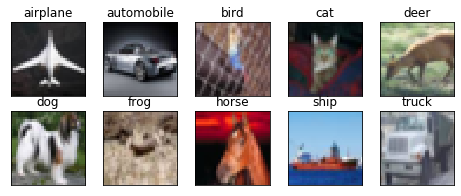

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(48, 3, 3, input_shape=(32, 32, 3)))#32
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(SeparableConv2D(48, 3, 3))#30
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))#15
model.add(Dropout(0.25))
model.add(SeparableConv2D(96, 3, 3, border_mode='same'))#15
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(SeparableConv2D(96, 3, 3))#13
model.add(BatchNormalization())
model.add(Activation('elu'))   
model.add(MaxPooling2D(pool_size=(2, 2)))#6
model.add(Dropout(0.4))
model.add(SeparableConv2D(192, 3, 3,border_mode='same'))#4
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(192, 3, 3))#2
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(SeparableConv2D(num_classes,kernel_size=(2,2)))
model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), input_shape=(32, 32, 3...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykern

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_236 (Separa (None, 30, 30, 48)        219       
_________________________________________________________________
batch_normalization_37 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
activation_253 (Activation)  (None, 30, 30, 48)        0         
_________________________________________________________________
separable_conv2d_237 (Separa (None, 28, 28, 48)        2784      
_________________________________________________________________
batch_normalization_38 (Batc (None, 28, 28, 48)        192       
_________________________________________________________________
activation_254 (Activation)  (None, 28, 28, 48)        0         
_________________________________________________________________
max_pooling2d_113 (MaxPoolin (None, 14, 14, 48)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`
  app.launch_new_instance()


Epoch 1/50
390/390 [==============================] - 37s 95ms/step - loss: 1.3742 - acc: 0.5014 - val_loss: 1.3988 - val_acc: 0.5484
Epoch 2/50
390/390 [==============================] - 28s 71ms/step - loss: 1.0189 - acc: 0.6352 - val_loss: 1.0049 - val_acc: 0.6564
Epoch 3/50
390/390 [==============================] - 28s 71ms/step - loss: 0.8870 - acc: 0.6841 - val_loss: 0.9708 - val_acc: 0.6715
Epoch 4/50
390/390 [==============================] - 28s 71ms/step - loss: 0.8030 - acc: 0.7172 - val_loss: 0.7382 - val_acc: 0.7411
Epoch 5/50
390/390 [==============================] - 28s 71ms/step - loss: 0.7512 - acc: 0.7372 - val_loss: 0.7794 - val_acc: 0.7339
Epoch 6/50
390/390 [==============================] - 28s 72ms/step - loss: 0.7100 - acc: 0.7498 - val_loss: 0.6611 - val_acc: 0.7721
Epoch 7/50
390/390 [==============================] - 28s 71ms/step - loss: 0.6811 - acc: 0.7613 - val_loss: 0.6688 - val_acc: 0.7681
Epoch 8/50
390/390 [==============================] - 28s 71ms

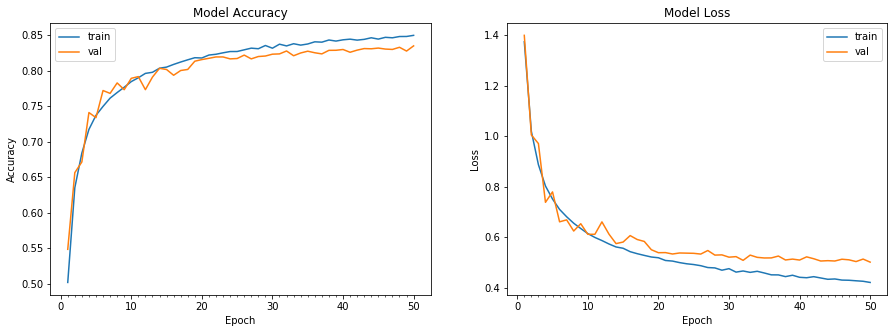

Accuracy on test data is: 83.50


In [0]:

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False
                            )
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[LearningRateScheduler(scheduler)])

end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))